<p style="font-size: 22pt; color: green; font-family: 'Times New Roman';">
 Import Modules necessary for running this notebook 
</p>

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd

import fun_CondProb as fn

<span style="font-family: 'Times New Roman'; font-size: 32px; color: red;"> List available FACTS Data:: <br> </span>
    

<span style="font-size: 22px; color: green;"> :: FACTS 1.1.1 run</span> 
    

In [2]:
ssp='ssp585'
# path = f'/projects/kopp/ar2208/factsv1.1.1/coupling.{ssp}/output/'
path = f'/Users/dota/werk/2022_09_FACTS/0000_facts-OPdata/amarel/ar2208/factsv1.1.1/coupling.{ssp}/output/'
files=fn.list_files_with_names(path, ["global"])
#
df = pd.DataFrame(files, columns=['File Name']).reset_index().rename(columns={'index': 'Index'})
print(df.to_string(index=False))

 Index                                                          File Name
     0            coupling.ssp585.GrIS1f.FittedISMIP.GrIS_GIS_globalsl.nc
     1           coupling.ssp585.ar5AIS.ipccar5.icesheets_AIS_globalsl.nc
     2          coupling.ssp585.ar5AIS.ipccar5.icesheets_EAIS_globalsl.nc
     3           coupling.ssp585.ar5AIS.ipccar5.icesheets_GIS_globalsl.nc
     4          coupling.ssp585.ar5AIS.ipccar5.icesheets_WAIS_globalsl.nc
     5           coupling.ssp585.ar5glaciers.ipccar5.glaciers_globalsl.nc
     6        coupling.ssp585.bamber19.bamber19.icesheets_AIS_globalsl.nc
     7       coupling.ssp585.bamber19.bamber19.icesheets_EAIS_globalsl.nc
     8        coupling.ssp585.bamber19.bamber19.icesheets_GIS_globalsl.nc
     9       coupling.ssp585.bamber19.bamber19.icesheets_WAIS_globalsl.nc
    10            coupling.ssp585.deconto21.deconto21.AIS_AIS_globalsl.nc
    11           coupling.ssp585.deconto21.deconto21.AIS_EAIS_globalsl.nc
    12           coupling.ssp585.decon

<hr style="border: none; height: 2px; background-color: none; border-style: dotted;">
<p style="font-size: 32px; color: green;">&#10145; Choose <span style="color: blue;">data</span> file.</p>

In [9]:
start_year=2020; end_year=2100; unit='cm'; station=0
ssps = ['ssp119', 'ssp126','ssp245','ssp370', 'ssp585']

# Base path of data folder (all ssp).
base_path = '/Users/dota/werk/2022_09_FACTS/0000_facts-OPdata/amarel/ar2208/factsv1.1.1'

# Dictionary of filenames
file_names = {
    'lar': 'larmip.larmip.AIS_globalsl.nc',
    'b19': 'bamber19.bamber19.icesheets_AIS_globalsl.nc',
    'd21': 'deconto21.deconto21.AIS_AIS_globalsl.nc',
    'ar5': 'ar5AIS.ipccar5.icesheets_AIS_globalsl.nc'
}

# Dictionary to store the results
AIS_all_ssp = {key: {} for key in file_names}

# Loop over each SSP scenario
for ssp in ssps:
    for key, filename in file_names.items():
        file_path = f'{base_path}/coupling.{ssp}/output/coupling.{ssp}.{filename}'
        dat, slc, time, lat, lon = fn.extract_nc_info(file_path, station, unit, start_year, end_year)
        AIS_all_ssp[key][ssp] = {'dat': dat, 'slc': slc, 'time': time, 'lat': lat, 'lon': lon, 'path': file_path}
del dat, slc, time, lat, lon, ssp, file_path, key, file_names

<div style="position: relative; width: 100%;">
    <hr style="position: absolute; left: 0; width: 50%; border: none; height: 2px; background-color: yellow; border-style: dotted;">
</div>

<span style="font-family: 'Times New Roman'; font-size: 22pt; color: green;">
     :: </span> 
<span style="color: red;"> PLOT </span>

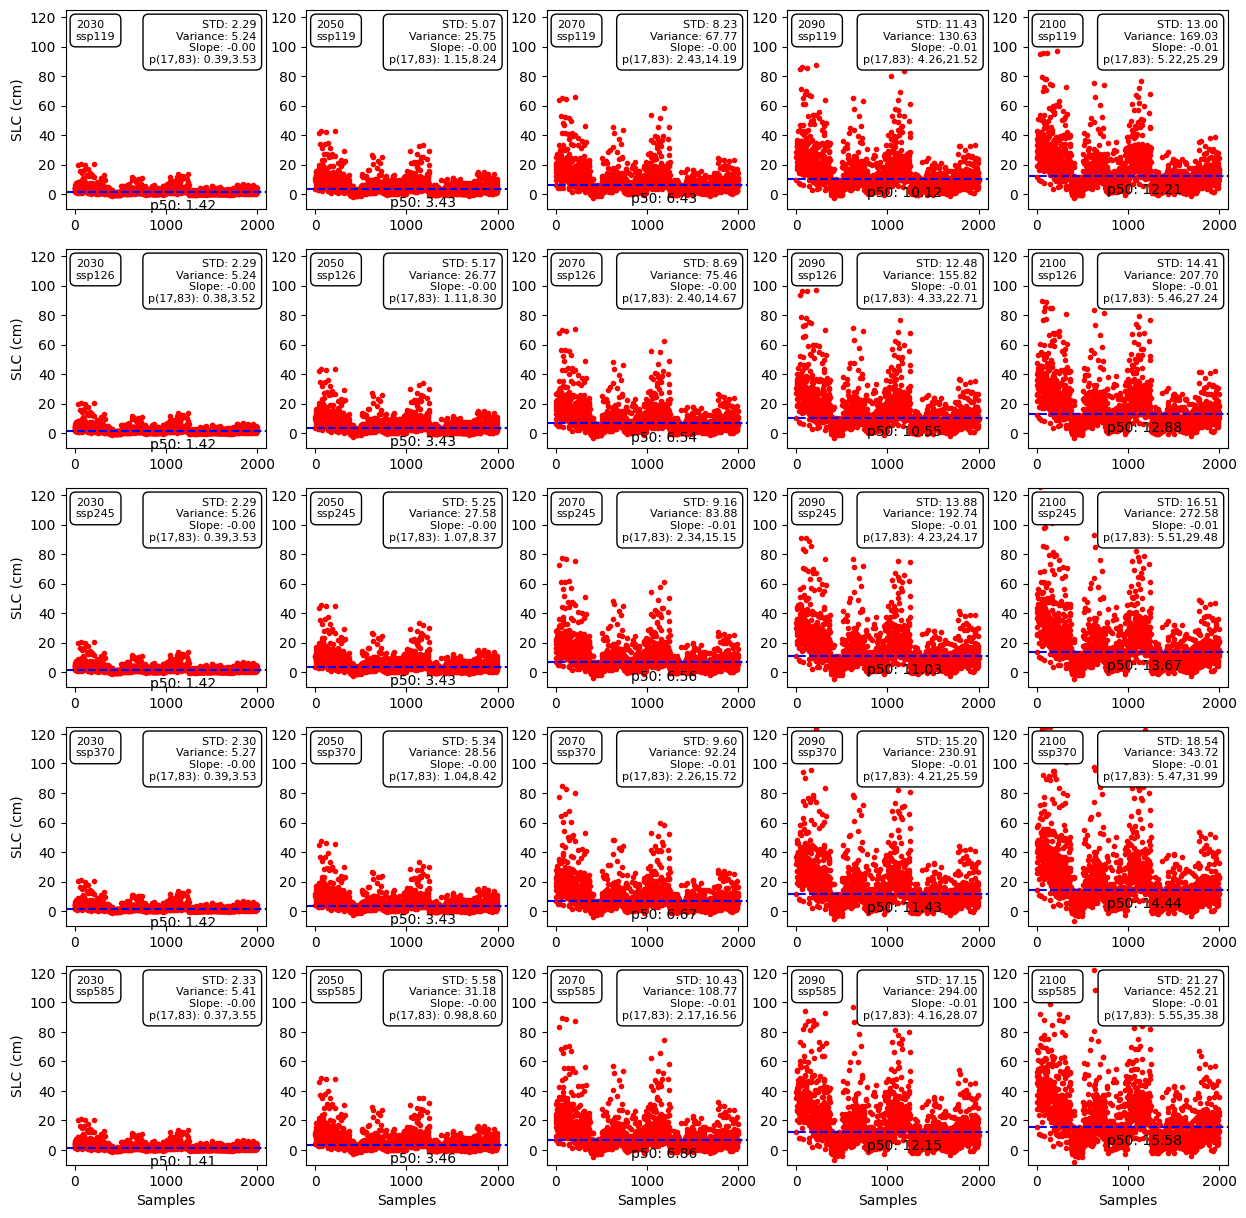

In [4]:

ssps=ssps; comp='lar'; data_=AIS_all_ssp; years_=[2030,2050,2070,2090, 2100]
fn.PLOT_samps(ssps,comp,data_,years_,color='r')

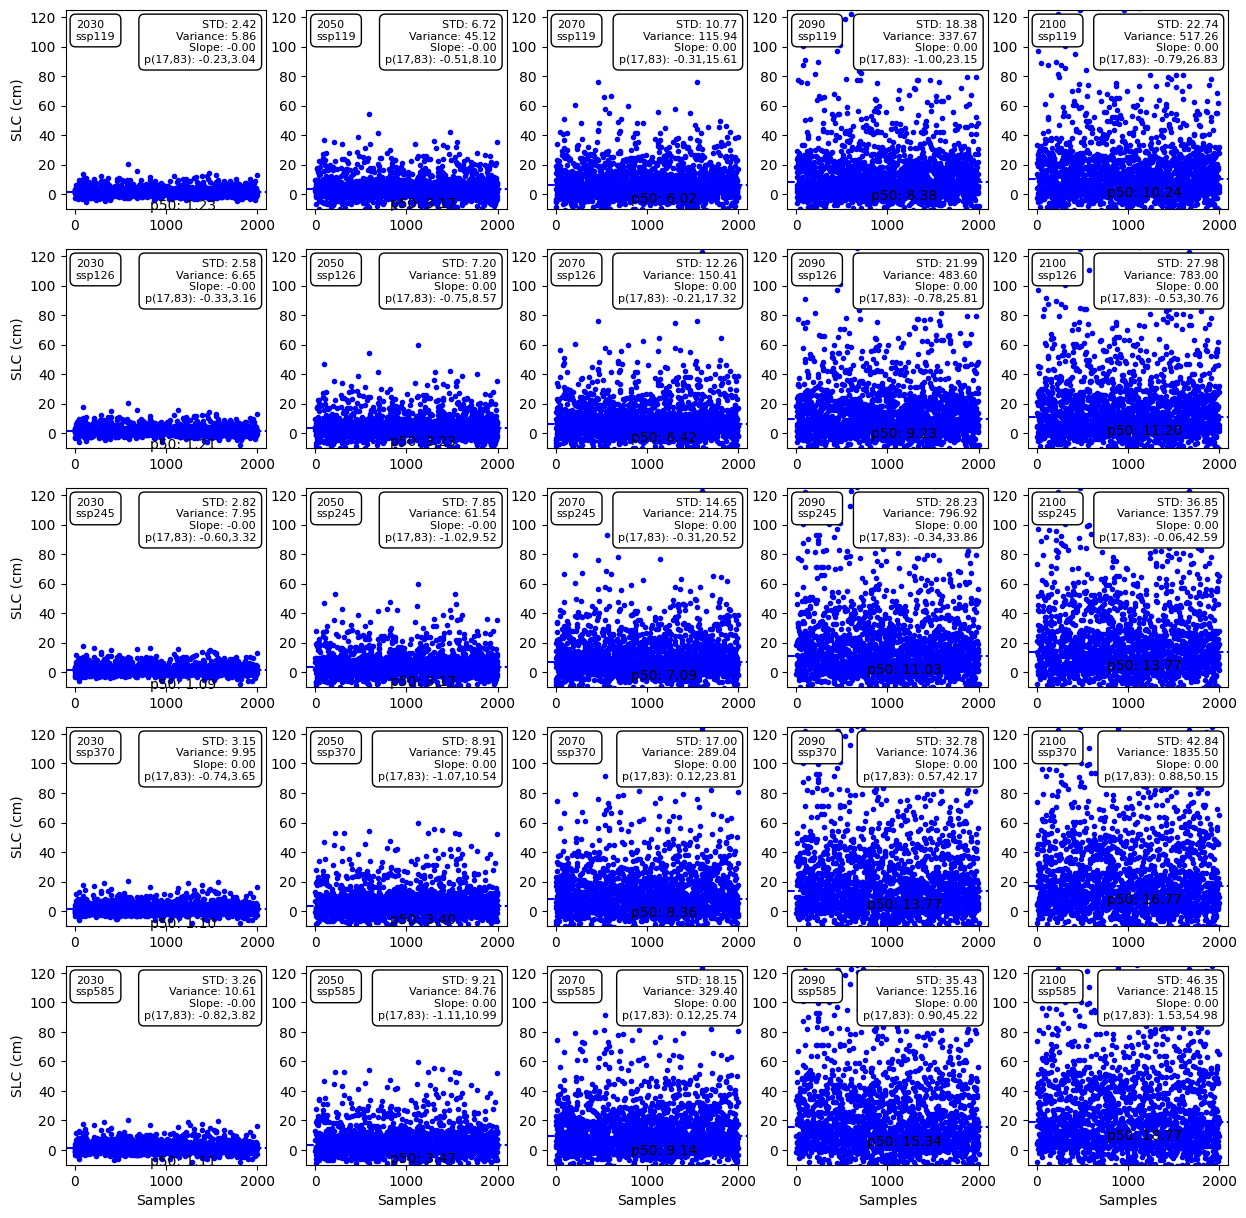

In [8]:

ssps=ssps; comp='b19'; data_=AIS_all_ssp; years_=[2030,2050,2070,2090, 2100]
fn.PLOT_samps(ssps,comp,data_,years_,color='b')

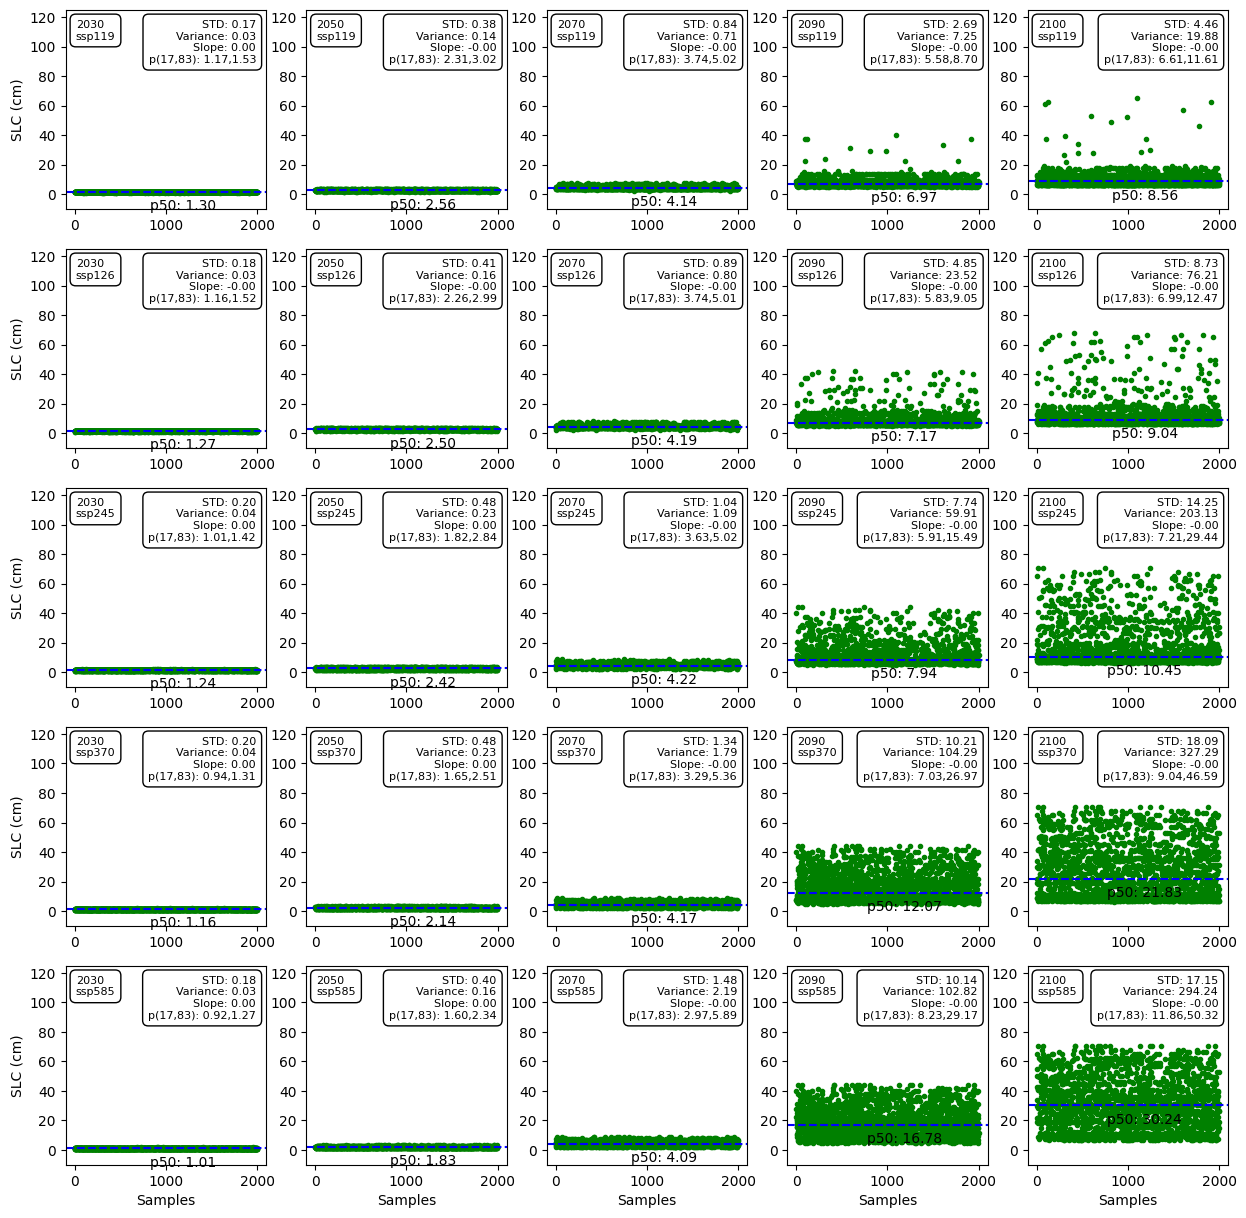

In [10]:

ssps=ssps; comp='d21'; data_=AIS_all_ssp; years_=[2030,2050,2070,2090, 2100]
fn.PLOT_samps(ssps,comp,data_,years_,color='g')

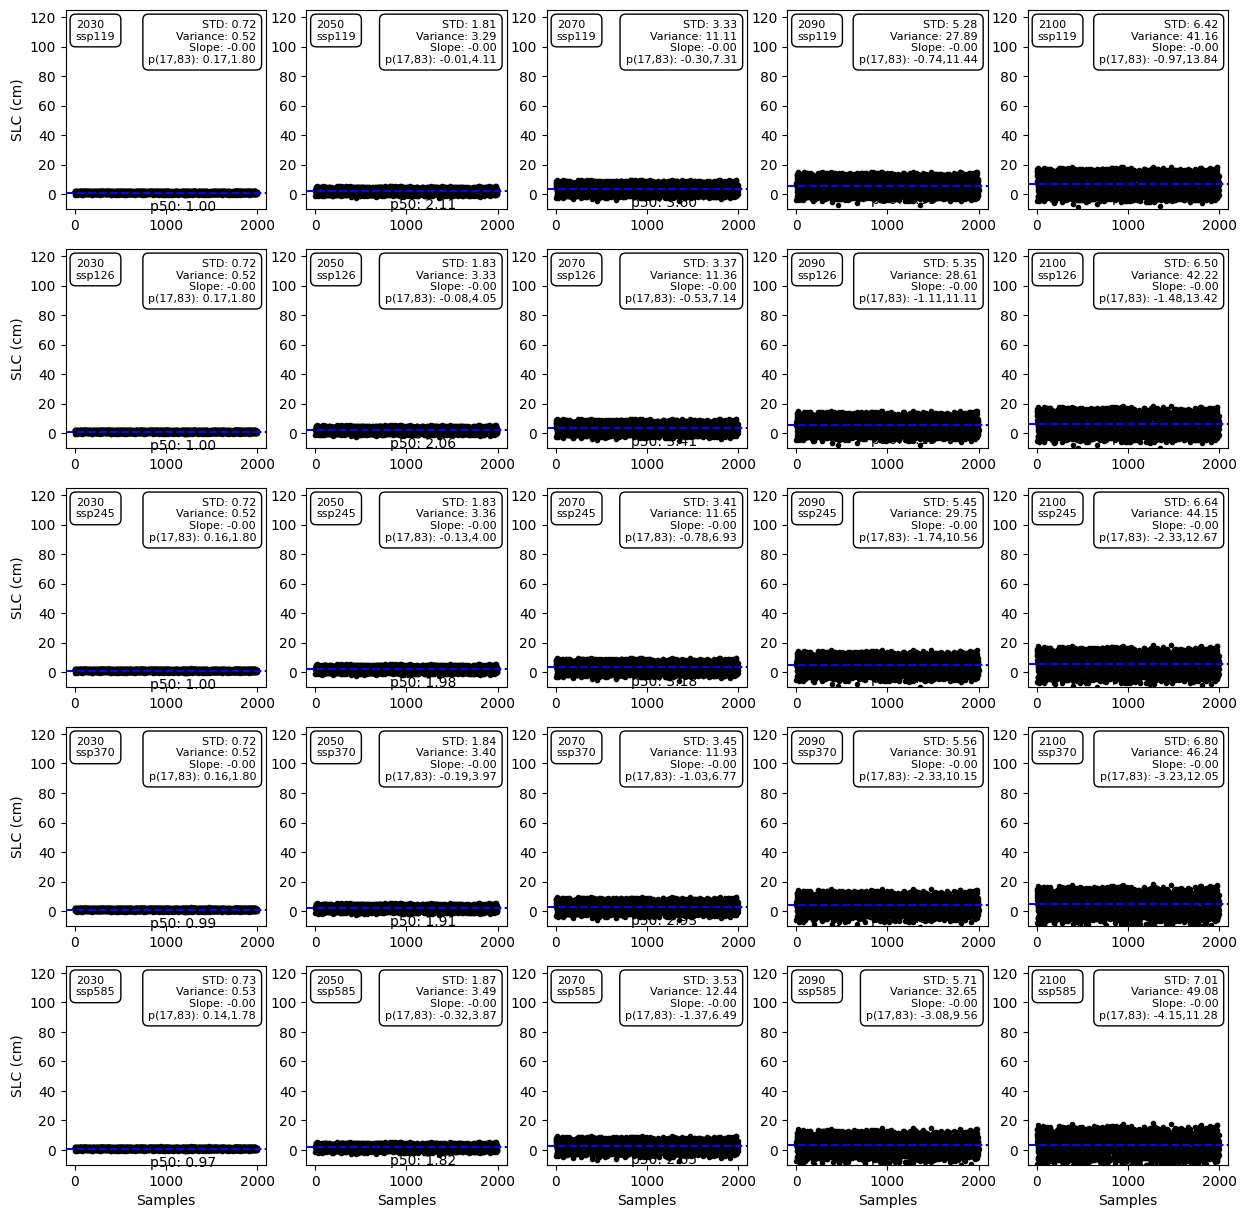

In [11]:

ssps=ssps; comp='ar5'; data_=AIS_all_ssp; years_=[2030,2050,2070,2090, 2100]
fn.PLOT_samps(ssps,comp,data_,years_,color='k')